In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.path as mplPath
import numpy as np
import cv2
%matplotlib inline

last_slope_left = 1
last_slope_right = 1

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


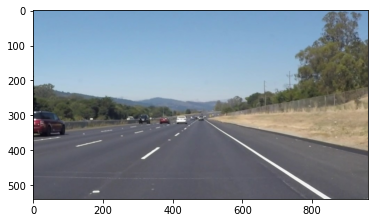

In [ ]:
image = mpimg.imread('test_images/solidWhiteRight.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)  

In [ ]:
import math

def grayscale(img):
   
    
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
   
    
def canny(img, low_threshold, high_threshold):
    
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    
    
    mask = np.zeros_like(img)   
    
    
    if len(img.shape) > 2:
        channel_count = img.shape[2]  
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
       
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
  
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
   
    
  
    leftLane = [0, 0, 0, 0, 0]
    rightLane = [0, 0, 0, 0, 0]
    
    # https://stackoverflow.com/questions/39660851/deciding-if-a-point-is-inside-a-polygon-python
    vertices = np.array([[100,540],[420, 330], [520, 330], [900,540]])
    bbPath = mplPath.Path(vertices)
    
    minX = 100
    maxX = 900
    
    minY = 330
    maxY = 540
    
   
    for line in lines:
        for x1,y1,x2,y2 in line:
            
            
            if (bbPath.contains_point([x1, y1]) is not True):
                continue
                
            m = (y2 - y1) / (x2 - x1)
            
            b = y1 - (m * x1)
            if (m > 0):
                rightLane[0] = rightLane[0] + m
                rightLane[1] += 1
                rightLane[2] += b
                rightLane[3] = x1
                rightLane[4] = y1
            else:
                leftLane[0] = leftLane[0] + m
                leftLane[1] += 1
                leftLane[2] += b
                leftLane[3] = x1
                leftLane[4] = y1
            
        
    
    left_lane_slope = 0
    left_lane_y_intercept = 0
    right_lane_slope = 0
    right_lane_y_intercept = 0
    
    global last_slope_left
    global last_slope_right
    
    if (leftLane[1] != 0):
        left_lane_slope = leftLane[0] / leftLane[1]
        left_lane_y_intercept = leftLane[2] / leftLane[1]
        last_slope_left = left_lane_slope
    else:
        left_lane_slope = last_slope_left
    
    if (rightLane[1] != 0):
        right_lane_slope = rightLane[0] / rightLane[1]
        right_lane_y_intercept = rightLane[2] / rightLane[1]
        last_slope_right = right_lane_slope
    else:
        right_lane_slope = last_slope_right
    
    
    x_bottom_left_lane = (maxY - left_lane_y_intercept) / left_lane_slope
    y_bottom_left_lane = left_lane_slope * x_bottom_left_lane + left_lane_y_intercept

    
    x_top_left_lane = (minY - left_lane_y_intercept) / left_lane_slope
    y_top_left_lane = left_lane_slope * x_top_left_lane + left_lane_y_intercept
    
    cv2.line(img, (int(round(x_bottom_left_lane)), int(round(y_bottom_left_lane))), (int(round(x_top_left_lane)), int(round(y_top_left_lane))), [255, 0, 0], thickness)
    
    
    minX_right = 100
    maxX_right = 900
    
    minY_right = 330
    maxY_right = 540
    
    x_bottom_right_lane = (maxY_right - right_lane_y_intercept) / right_lane_slope
    y_bottom_right_lane = right_lane_slope * x_bottom_right_lane + right_lane_y_intercept
    
    x_top_right_lane = (minY - right_lane_y_intercept) / right_lane_slope
    y_top_right_lane = right_lane_slope * x_top_right_lane + right_lane_y_intercept
    
    cv2.line(img, (int(round(x_bottom_right_lane)), int(round(y_bottom_right_lane))), (int(round(x_top_right_lane)), int(round(y_top_right_lane))), [0, 255, 0], thickness)
    
    
  
        


def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
   
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines, [0, 255, 0], 15)
    return line_img



def weighted_img(img, initial_img, α=0.8, β=1., γ=0.):
   
    return cv2.addWeighted(initial_img, α, img, β, γ)

In [ ]:
import os
os.listdir("test_images/")

['.ipynb_checkpoints',
 'whiteCarLaneSwitch.jpg',
 'solidWhiteRight.jpg',
 'solidYellowCurve.jpg',
 'solidWhiteCurve.jpg',
 'solidYellowLeft.jpg']

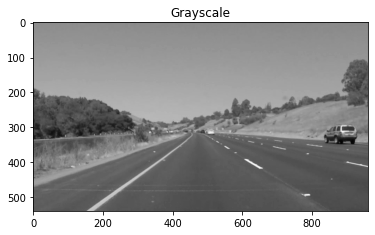

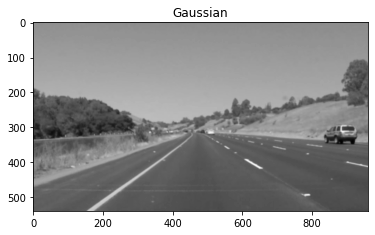

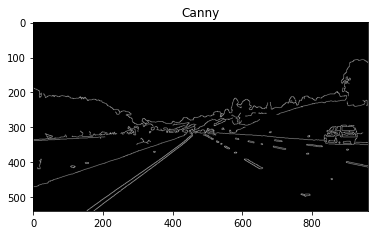

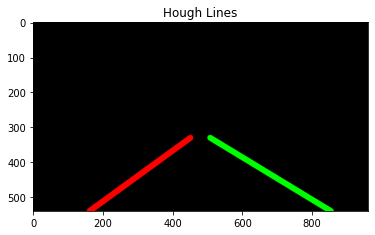

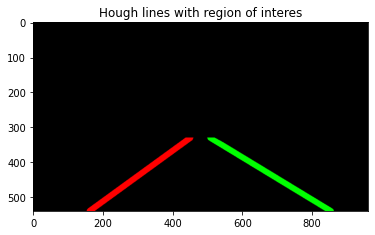

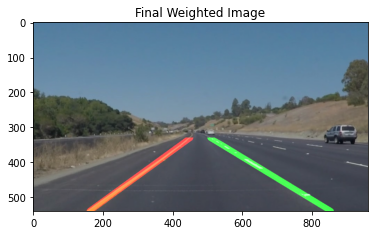

In [ ]:


image = mpimg.imread('test_images/solidYellowCurve.jpg')

gray_img = grayscale(image)

gaussian_img = gaussian_blur(gray_img, 5)


canny_img = canny(gaussian_img, 50, 150)


rho = 1 
theta = np.pi/180 
threshold = 20     
min_line_length = 30 
max_line_gap = 3    

hough_img = hough_lines(canny_img, rho, theta, threshold, min_line_length, max_line_gap)

imshape = hough_img.shape
vertices = np.array([[(100,imshape[0]),(420, 330), (520, 330), (imshape[1]-60,imshape[0])]], dtype=np.int32)


reg_interest_img = region_of_interest(hough_img, vertices)

final_image = weighted_img(reg_interest_img, image)

plt.imshow(gray_img, cmap='gray')
plt.title("Grayscale")
plt.show()

plt.imshow(gaussian_img, cmap='gray')
plt.title("Gaussian")
plt.show()

plt.imshow(canny_img, cmap='gray')
plt.title("Canny")
plt.show()

plt.imshow(hough_img, cmap='gray')
plt.title("Hough Lines")
plt.show()

plt.imshow(reg_interest_img, cmap='gray')
plt.title("Hough lines with region of interes")
plt.show()

plt.imshow(final_image, cmap='gray')
plt.title("Final Weighted Image")
plt.show()

In [ ]:

from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [ ]:
def process_image(image):
    
    
   
    gray_img = grayscale(image)

    
    gaussian_img = gaussian_blur(gray_img, 5)

   
    canny_img = canny(gaussian_img, 50, 150)

    
    rho = 1 
    theta = np.pi/180 
    threshold = 20     
    min_line_length = 30 
    max_line_gap = 3    

    hough_img = hough_lines(canny_img, rho, theta, threshold, min_line_length, max_line_gap)

    imshape = hough_img.shape
    vertices = np.array([[(100,imshape[0]),(420, 330), (520, 330), (imshape[1]-60,imshape[0])]], dtype=np.int32)

    reg_interest_img = region_of_interest(hough_img, vertices)

    final_image = weighted_img(reg_interest_img, image)

    return final_image

In [ ]:
white_output = 'test_videos_output/solidWhiteRight.mp4'
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image)
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/solidWhiteRight.mp4
[MoviePy] Writing video test_videos_output/solidWhiteRight.mp4


100%|█████████▉| 221/222 [00:10<00:00, 21.05it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidWhiteRight.mp4 

CPU times: user 4.9 s, sys: 348 ms, total: 5.25 s
Wall time: 12 s


In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

In [ ]:
yellow_output = 'test_videos_output/solidYellowLeft.mp4'
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/solidYellowLeft.mp4
[MoviePy] Writing video test_videos_output/solidYellowLeft.mp4


100%|█████████▉| 681/682 [00:35<00:00, 19.04it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidYellowLeft.mp4 

CPU times: user 15.8 s, sys: 1.18 s, total: 17 s
Wall time: 37.2 s
